In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mc = pd.read_csv("marketing_campaign.csv", sep="\t")
mc = mc.head(100)
mc = mc.dropna()
mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7516,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,...,6,0,0,0,0,0,0,3,11,0
96,7247,1960,Graduation,Widow,47916.0,0,1,22-11-2012,72,505,...,6,0,1,0,0,0,0,3,11,0
97,11100,1972,Graduation,Divorced,51813.0,1,1,11-04-2013,37,51,...,7,0,0,0,0,0,0,3,11,0
98,4646,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,...,2,0,0,0,1,0,0,3,11,0


In [3]:
x = mc.iloc[:,[4,8]]
x 

,Income,Recency
0,58138.0,58
1,46344.0,38
2,71613.0,26
3,26646.0,26
4,58293.0,94
...,...,...
95,30096.0,30
96,47916.0,72
97,51813.0,37
98,78497.0,44


In [4]:
print(x.shape)

(91, 2)


In [5]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

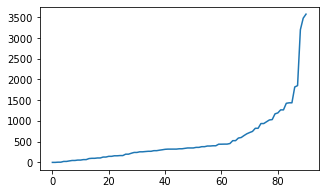

In [6]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [7]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ 

In [ ]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # 